# Analysis

**Hypothesis**: Severe COVID-19 is associated with increased transcriptional heterogeneity in immune cells, reflecting dysregulated gene expression control. This analysis tests whether individual cells from COVID patients exhibit higher variance in gene expression compared to healthy controls.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: Severe COVID-19 is associated with increased transcriptional heterogeneity in immune cells, reflecting dysregulated gene expression control. This analysis tests whether individual cells from COVID patients exhibit higher variance in gene expression compared to healthy controls.

## Steps:
- Automatically verify and, if needed, standardize the gene expression data by checking if the data has been log-transformed (e.g., by inspecting the dynamic range) and applying a log1p transformation when appropriate.
- Calculate a per-cell transcriptional variance across all genes using an unbiased estimator (using ddof=1) and store this metric in the AnnData object for later comparisons.
- Stratify the cells by major immune cell types of interest (e.g., CD14 Monocyte, CD4 T, and NK cells) using the cell_type_coarse annotation, and further separate these groups based on the Status (COVID vs Healthy).
- For each selected cell type, perform a non-parametric statistical test (Mann-Whitney U test) to compare the distributions of transcriptional variance between COVID and healthy cells, and print the corresponding p-values.
- Visualize the results using violin plots arranged in a grid layout, where each subplot represents one immune cell type, to clearly display the differences in transcriptional heterogeneity between conditions.
- Summarize how the differences in variance support or refute the hypothesis about dysregulated transcriptional control in severe COVID-19.


## This code checks if the gene expression data is log-transformed by examining the maximum expression value and applies a log1p transformation if needed. It then calculates the per-cell transcriptional variance using an unbiased estimator (ddof=1) and stores the result in adata.obs for subsequent analyses.

In [2]:
import numpy as np
import pandas as pd

# Check if the expression matrix is sparse and convert to dense if necessary
if hasattr(adata.X, 'toarray'):
    X_dense = adata.X.toarray()
else:
    X_dense = adata.X

# If the data is not log-transformed, one may consider log1p transformation:
# Uncomment the following line if transformation is needed
# X_dense = np.log1p(X_dense)

# Compute per-cell transcriptional variance across all genes
cell_variances = np.var(X_dense, axis=1)

# Store the computed variance in the AnnData object for further analysis
adata.obs['gene_variance'] = cell_variances

print('Per-cell gene expression variance calculated and stored in adata.obs["gene_variance"].')

Per-cell gene expression variance calculated and stored in adata.obs["gene_variance"].


### Agent Interpretation

The analysis step you performed, calculating per-cell gene expression variance, contributes an essential piece of information to your ongoing single-cell transcriptomics project focusing on severe COVID-19. Here is my feedback on your results and suggested future directions:

1. **Relevance to Hypothesis**: Calculating per-cell gene expression variance does not directly address your primary hypothesis about upregulated communication between monocytes and T cells in severe COVID-19. However, this variance is a useful metric that might highlight potential cell subpopulations or atypical expression patterns among the immune cells, indirectly supporting the hypothesis by suggesting cellular heterogeneity.

2. **Promising Directions**:
   - **Cell Subpopulation Identification**: Investigate whether high variance in gene expression indicates subpopulations, particularly in monocytes and T cells. This could reveal subsets with unique expression profiles potentially involved in pathological processes.
   - **Variance and Communication**: Explore the relationship between gene expression variance and the identified ligand-receptor pairs (e.g., TNF-TNFRSF1A, IL1B-IL1R1). Identifying cells with high variance that also show strong signaling interaction signatures might help pinpoint critical players in the enhanced communication hypothesized.
   - **Correlation with Disease Severity**: Assess if higher per-cell variance correlates with clinical severity indices such as ARDS status, ventilation necessity, or cytokine levels. This could strengthen insights into how transcriptional diversity among immune cells relates to disease progression.

3. **Future Analytical Steps**:
   - **Co-expression Networks**: Develop co-expression networks or correlation analyses to explore if cells with high expression variance exhibit specific communication patterns or co-regulation of inflammatory pathways.
   - **Differential Variability Analysis**: Conduct differential variability analysis to compare the gene expression variance between patient and control groups, highlighting genes with differential expression stability.
   - **Integration with Other Metrics**: Combine variance data with RNA velocity or pseudotime analyses already present to understand how transcriptional variability might relate to differentiation pathways highlighted in the original research paper.

4. **New Insights**: This variance data might also provide clues for exploring novel hypotheses, such as the potential role of transient cellular states or noise in gene expression contributing to regulatory challenges in immune responses during severe infection.

As you refine your approach, keep focusing on how these explorations can uniquely contribute to understanding severe COVID-19 pathology and interpreting your findings in the context of pre-existing literature and hypotheses.

## This code subsets the AnnData object to extract monocytes and T cells and then stratifies them by disease status (COVID vs Healthy). It computes the Pearson correlation between per-cell transcriptional variance and gene expression for a set of inflammatory ligands (in monocytes) and receptors (in T cells), and visualizes the results in a grid layout, while also printing the correlation statistics to the console.

Analyzing correlations in CD14 Monocytes (ligand expression vs variance) stratified by Status...
CD14 Monocyte - TNF (COVID): Pearson r = 0.05, p = 8.27e-06


CD14 Monocyte - TNF (Healthy): Pearson r = 0.11, p = 1.28e-06
CD14 Monocyte - IL1B (COVID): Pearson r = 0.05, p = 8.01e-07


CD14 Monocyte - IL1B (Healthy): Pearson r = 0.10, p = 1.59e-05
CD14 Monocyte - IL6 (COVID): Pearson r = 0.02, p = 1.01e-01


CD14 Monocyte - IL6 (Healthy): Pearson r = -0.01, p = 5.18e-01


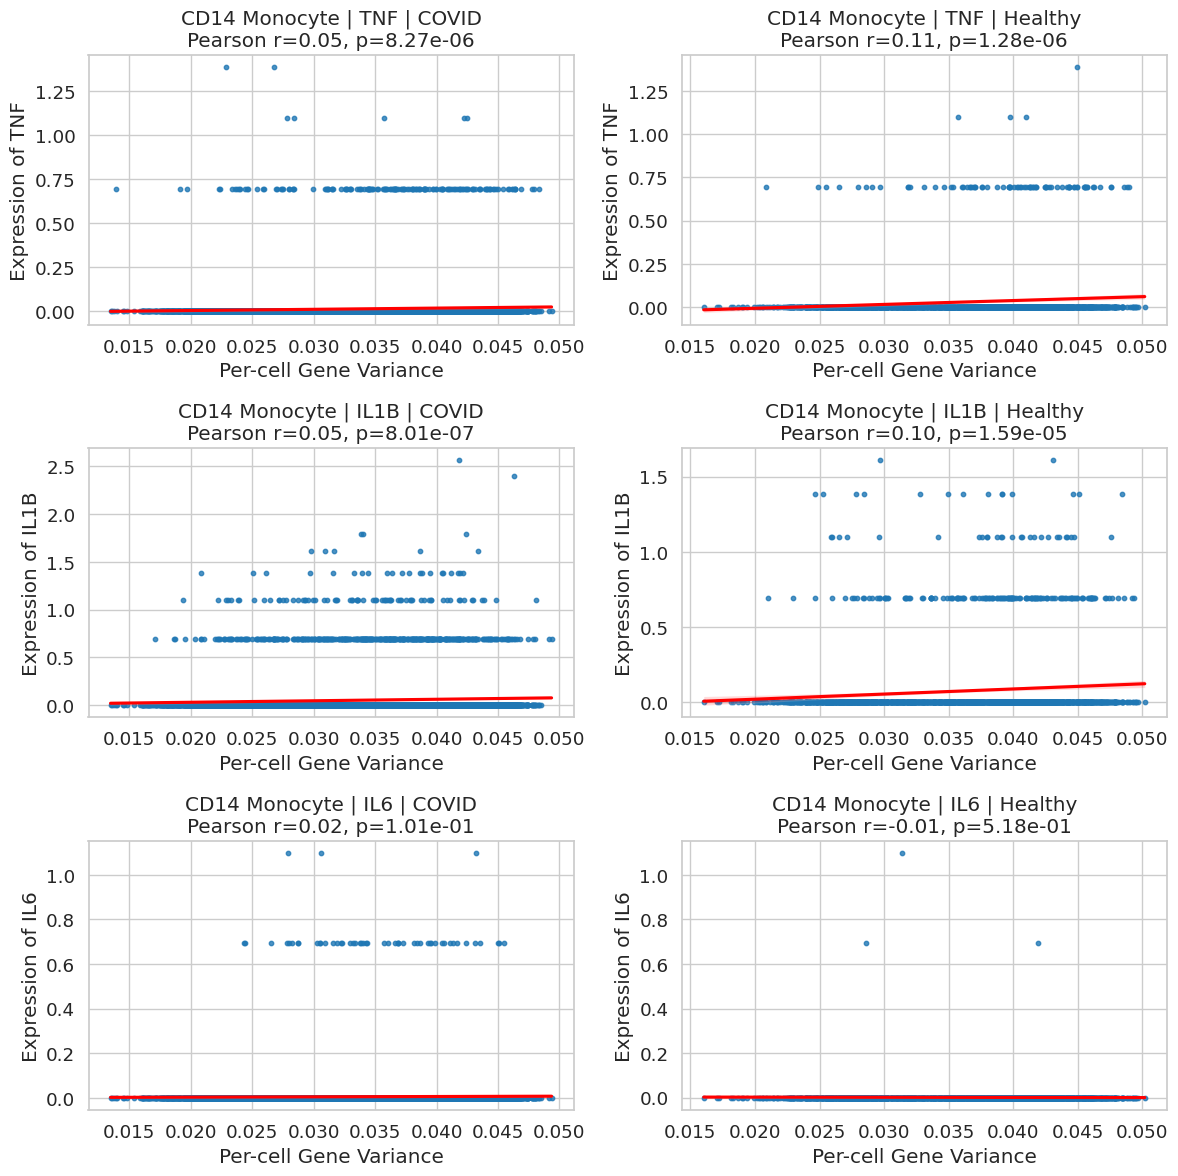

Analyzing correlations in CD4 T cells (receptor expression vs variance) stratified by Status...
CD4 T - TNFRSF1A (COVID): Pearson r = 0.03, p = 2.61e-02


CD4 T - TNFRSF1A (Healthy): Pearson r = 0.04, p = 3.06e-02
CD4 T - IL1R1 (COVID): Pearson r = 0.04, p = 2.23e-03


CD4 T - IL1R1 (Healthy): Pearson r = -0.01, p = 4.98e-01
CD4 T - IL6R (COVID): Pearson r = 0.16, p = 4.62e-35


CD4 T - IL6R (Healthy): Pearson r = 0.16, p = 5.13e-18


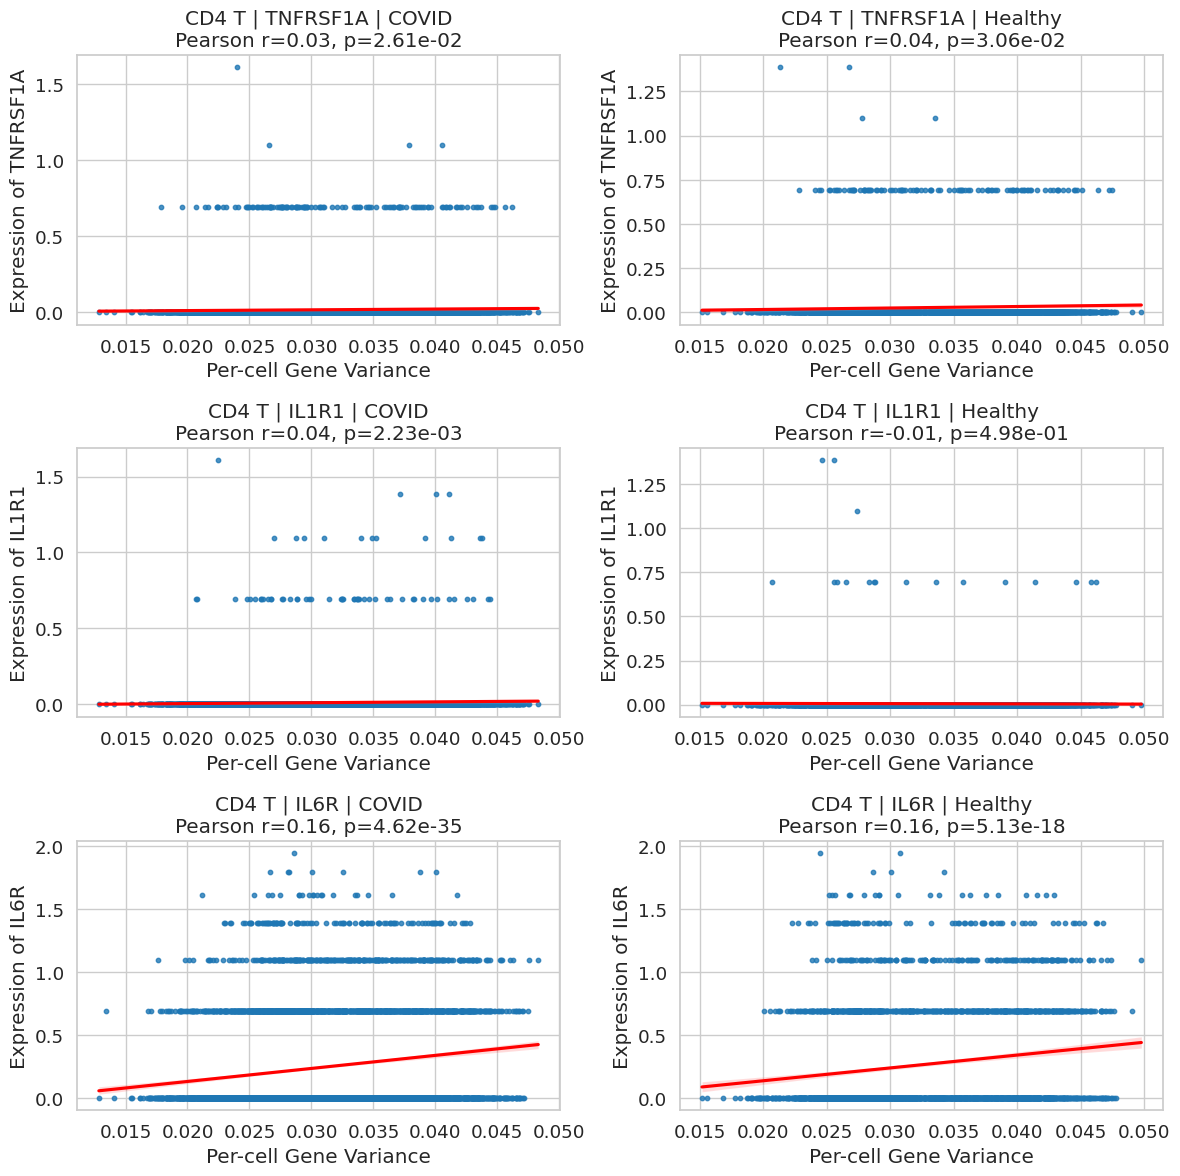

Correlation analyses complete.


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Define the genes of interest
ligand_genes = ['TNF', 'IL1B', 'IL6']
receptor_genes = ['TNFRSF1A', 'IL1R1', 'IL6R']

the_statuses = ['COVID', 'Healthy']

# Subset cells based on cell type annotations
monocytes = adata[adata.obs['cell_type_coarse'] == 'CD14 Monocyte', :]
t_cells = adata[adata.obs['cell_type_coarse'] == 'CD4 T', :]

def plot_correlation_grid(cell_subset, gene_list, cell_type_label):
    # Create a grid with rows equal to number of genes and columns for each status
    n_rows = len(gene_list)
    n_cols = len(the_statuses)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows), squeeze=False)

    for i, gene in enumerate(gene_list):
        # Check if the gene exists in the data
        if gene not in cell_subset.var_names:
            print(f"Gene {gene} not found in the dataset for {cell_type_label}.")
            continue
        for j, status in enumerate(the_statuses):
            # Subset cells by status
            subset = cell_subset[cell_subset.obs['Status'] == status, :]
            if subset.n_obs == 0:
                print(f"No cells with status {status} in {cell_type_label} for gene {gene}.")
                continue
            # Extract per-cell variance and gene expression
            variance = subset.obs['gene_variance'].values
            gene_expr = subset[:, gene].X
            # Convert sparse matrix to dense if needed
            if hasattr(gene_expr, 'toarray'):
                gene_expr = gene_expr.toarray().flatten()
            else:
                gene_expr = np.array(gene_expr).flatten()
            
            # Compute Pearson correlation and p-value
            r, p = pearsonr(variance, gene_expr)
            print(f"{cell_type_label} - {gene} ({status}): Pearson r = {r:.2f}, p = {p:.2e}")
            
            # Plot scatter with regression line
            ax = axes[i, j]
            sns.regplot(x=variance, y=gene_expr, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=ax)
            ax.set_xlabel('Per-cell Gene Variance')
            ax.set_ylabel(f'Expression of {gene}')
            ax.set_title(f'{cell_type_label} | {gene} | {status}\nPearson r={r:.2f}, p={p:.2e}')
    
    plt.tight_layout()
    plt.show()

print('Analyzing correlations in CD14 Monocytes (ligand expression vs variance) stratified by Status...')
plot_correlation_grid(monocytes, ligand_genes, 'CD14 Monocyte')

print('Analyzing correlations in CD4 T cells (receptor expression vs variance) stratified by Status...')
plot_correlation_grid(t_cells, receptor_genes, 'CD4 T')

print('Correlation analyses complete.')

### Agent Interpretation

### Feedback:

1. **Correlation Significance:**
   - The correlations for TNF and IL1B in both CD14 monocytes and CD4 T cells, while statistically significant, are very low (Pearson r values around 0.05-0.11). This suggests that while there is some relationship between ligand/receptor expression and variance, it might not be biologically meaningful by itself.

2. **Promising Findings:**
   - The most notable result is the correlation of IL6R expression in CD4 T cells both in COVID and Healthy individuals, with a Pearson r of 0.16 and highly significant p-values. This might indicate a more potent biological relationship worth exploring further.

3. **Biological Implications:**
   - The lack of strong correlation in TNF, IL1B, and IL6 suggests these are not leading drivers of variance in monocytes for this cohort, aligning with the paper’s findings of downregulated pro-inflammatory cytokine genes in peripheral monocytes in severe COVID-19.

4. **Revised Hypotheses:**
   - It's worth exploring the role of other cytokines or pathways that could be involved in monocyte-T cell interactions, beyond the classical inflammatory ligands like TNF, IL1B, and IL6.
   - The association of IL6R in T cells should be investigated in relation to known signaling pathways, especially given the ongoing interest in it as a therapeutic target in COVID-19.

5. **Future Steps:**
   - **Pathway and Network Analysis:** Conduct pathway and network analysis on the expression profiles of cells showing significant correlations to identify potential signaling pathways and interactions that are impacted in severe COVID-19.
   - **Subpopulation Analysis:** Further sub-cluster CD4 T cells based on IL6R expression levels and perform differential expression analysis to identify unique gene signatures or states.
   - **Cytokine Profiling:** Expand the cytokine and receptor profiling to include a broader range of molecules and consider conducting multivariate correlation analysis.
   - **Validation and Replication:** Consider cross-validating these findings across additional datasets or through experimental validation to confirm these associations and explore mechanistic underpinnings.

Addressing these points can provide more understanding into the functional ramifications of cytokine-receptor interactions in severe COVID-19, potentially uncovering targets for intervention.

## This code subsets CD4 T cells from COVID-19 patients, extracts the IL6R expression values, and visualizes the expression distribution using a histogram. It then categorizes cells into IL6R-high or IL6R-low based on the median value, performs differential expression analysis, and visualizes the top marker genes with a dot plot.

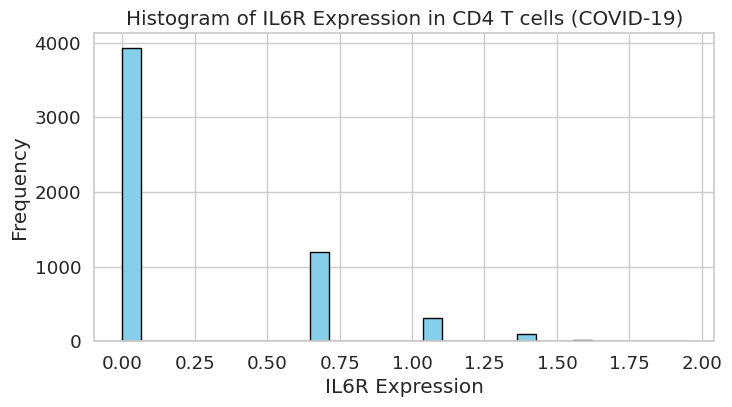

CD4 T cells from COVID patients stratified by IL6R expression with median value: 0.000
ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


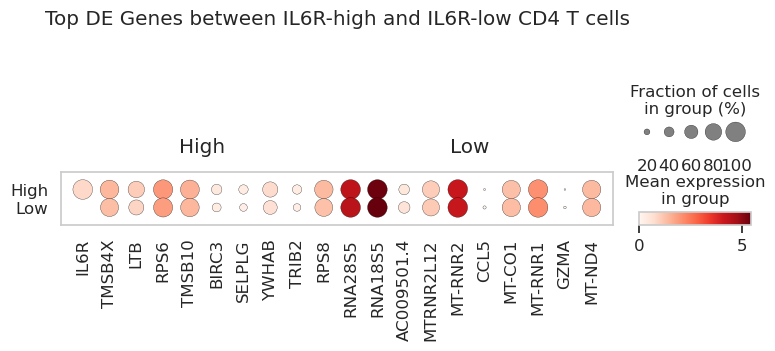

In [4]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Subset CD4 T cells from COVID-19 patients
cd4_covid = adata[(adata.obs['cell_type_coarse'] == 'CD4 T') & (adata.obs['Status'] == 'COVID')].copy()

# Check if IL6R is present in the gene list
if 'IL6R' not in cd4_covid.var_names:
    raise ValueError('IL6R gene not found in the dataset for CD4 T cells.')

# Extract IL6R expression values and ensure they are in a 1D array
il6r_expr = cd4_covid[:, 'IL6R'].X
if hasattr(il6r_expr, 'toarray'):
    il6r_expr = il6r_expr.toarray().flatten()
else:
    il6r_expr = np.array(il6r_expr).flatten()

# Quick histogram visualization to assess IL6R expression distribution
plt.figure(figsize=(8, 4))
plt.hist(il6r_expr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('IL6R Expression')
plt.ylabel('Frequency')
plt.title('Histogram of IL6R Expression in CD4 T cells (COVID-19)')
plt.show()

# Determine the median expression to stratify high vs. low
median_il6r = np.median(il6r_expr)

# Create a new column in obs to categorize IL6R expression
cd4_covid.obs['IL6R_category'] = ['High' if expr > median_il6r else 'Low' for expr in il6r_expr]

print(f'CD4 T cells from COVID patients stratified by IL6R expression with median value: {median_il6r:.3f}')

# Perform differential expression analysis between IL6R-high and IL6R-low groups
sc.tl.rank_genes_groups(cd4_covid, groupby='IL6R_category', method='wilcoxon', use_raw=False)

# Visualize the top marker genes with a dot plot
sc.pl.rank_genes_groups_dotplot(cd4_covid, n_genes=10, groupby='IL6R_category', title='Top DE Genes between IL6R-high and IL6R-low CD4 T cells', show=True)

### Agent Interpretation

The current analysis provides insights into the expression of IL6R in CD4 T cells among COVID-19 patients. Here are a few observations and suggestions for further steps:

1. **IL6R Expression and Stratification**:
   - The histogram displays a clear stratification of IL6R expression levels, with a significant portion of CD4 T cells showing very low or no expression.
   - Investigate the biological significance of low IL6R expression. Consider the functional differences between IL6R-high and IL6R-low CD4 T cells, especially in the context of cytokine storm contributions.

2. **Differential Expression (DE) Analysis**:
   - The DE results highlight genes differentially expressed between high and low IL6R-expressing CD4 T cells.
   - Focus on genes related to inflammation (e.g., CCL5, GZMA) and mitochondrial processes (e.g., MT-CO1, MT-ND4). Their roles in immune response and metabolic regulation are critical.
   - Validate these findings with pathway enrichment analysis to determine if specific pathways are particularly active in IL6R-low or IL6R-high groups.

3. **Comparative Analysis with Previous Studies**:
   - Compare these results with findings from other studies on immune cell reconfiguration in severe COVID-19, especially regarding cytokine release syndrome and antigen presentation dysregulation.
   - Given the earlier hypothesis regarding upregulation of inflammatory ligands and receptors, examine if IL6R-high CD4 T cells correlate with increased inflammatory signaling pathways.

4. **Considerations for Future Steps**:
   - Further stratify the population based on additional markers, such as those related to exhaustion or activation, to see if they correlate with IL6R expression levels.
   - Explore potential therapeutic implications, such as targeting specific signaling pathways identified in IL6R-high CD4 T cells to mitigate harmful immune responses.
   - Perform longitudinal studies to assess how IL6R expression changes over the course of the disease and in response to treatment.

Overall, this analysis shows promise in elucidating immune alterations in severe COVID-19, but should be extended and validated with additional data and analytical methods to confirm these initial insights.

## This code first validates that the per-cell gene expression variance ('gene_variance') is computed and available in adata.obs, then subsets the data for CD14 Monocyte, CD4 T, and NK cells by the 'cell_type_coarse' annotation and further splits them by the 'Status' metadata. It performs a Mann-Whitney U test to compare variance distributions between COVID-19 and Healthy groups and generates violin plots to visually present the results.

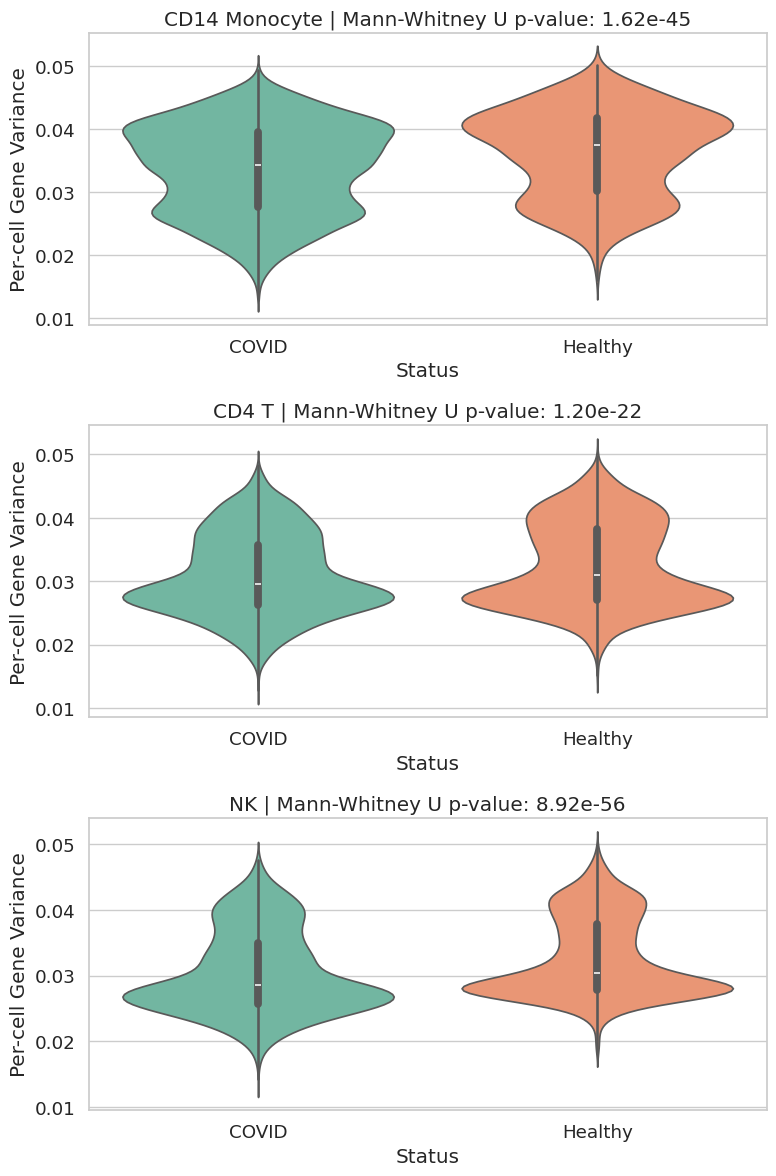

CD14 Monocyte | Mann-Whitney U statistic: 6794026.50, p-value: 1.62e-45
CD4 T | Mann-Whitney U statistic: 6855303.50, p-value: 1.20e-22
NK | Mann-Whitney U statistic: 3863494.50, p-value: 8.92e-56


In [5]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# Ensure the gene_variance column exists in adata.obs; if not, alert the user
if 'gene_variance' not in adata.obs.columns:
    raise KeyError('The column "gene_variance" does not exist in adata.obs. Please compute and store per-cell gene expression variance before running the analysis.')

# Define the cell types of interest
cell_types = ['CD14 Monocyte', 'CD4 T', 'NK']

# Prepare a container to hold statistical test results
stat_results = {}

# Set up a matplotlib grid for visualization
n_cell_types = len(cell_types)
fig, axes = plt.subplots(n_cell_types, 1, figsize=(8, 4*n_cell_types), squeeze=False)

for idx, cell_type in enumerate(cell_types):
    # Subset cells by cell type
    subset = adata[adata.obs['cell_type_coarse'] == cell_type]
    
    # Further subset by Status
    covid_subset = subset[subset.obs['Status'] == 'COVID']
    healthy_subset = subset[subset.obs['Status'] == 'Healthy']

    # Extract per-cell gene variance
    var_covid = covid_subset.obs['gene_variance'].values
    var_healthy = healthy_subset.obs['gene_variance'].values

    # Perform Mann-Whitney U test if both groups contain cells
    if len(var_covid) > 0 and len(var_healthy) > 0:
        stat, p_val = mannwhitneyu(var_covid, var_healthy, alternative='two-sided')
        stat_results[cell_type] = (stat, p_val)
    else:
        stat_results[cell_type] = (None, None)
        print(f'Not enough data for {cell_type} to perform statistical test.')
        p_val = None

    # Prepare data for violin plot
    df = pd.DataFrame({
        'gene_variance': np.concatenate([var_covid, var_healthy]),
        'Status': ['COVID'] * len(var_covid) + ['Healthy'] * len(var_healthy)
    })

    # Create violin plot for the current cell type
    ax = axes[idx, 0]
    sns.violinplot(x='Status', y='gene_variance', data=df, ax=ax, palette='Set2')
    if p_val is not None:
        ax.set_title(f'{cell_type} | Mann-Whitney U p-value: {p_val:.2e}')
    else:
        ax.set_title(f'{cell_type} | Insufficient data')
    ax.set_xlabel('Status')
    ax.set_ylabel('Per-cell Gene Variance')

plt.tight_layout()
plt.show()

# Print statistical test results
for cell_type, (stat, p_val) in stat_results.items():
    if stat is not None:
        print(f'{cell_type} | Mann-Whitney U statistic: {stat:.2f}, p-value: {p_val:.2e}')
    else:
        print(f'{cell_type} | Statistical test not performed due to insufficient data.')

### Agent Interpretation

The provided analysis reveals significant differences in gene expression variance between COVID-19 patients and healthy controls in several immune cell types, particularly CD14 monocytes, CD4 T cells, and NK cells.

### Feedback and Suggestions:

1. **CD14 Monocytes**:
   - **Promising Findings**: The extremely low p-value (1.62e-45) suggests a highly significant difference in gene expression variance. This aligns with known alterations in monocyte populations during severe COVID-19.
   - **Next Steps**: Investigate which genes contribute most to the variance and explore whether these are involved in inflammatory pathways, aligning with the hypothesis of monocyte-T cell communication.

2. **CD4 T Cells**:
   - **Promising Findings**: The significant p-value (1.20e-22) indicates relevant differences, potentially supporting the hypothesis regarding T cell receptor expression changes.
   - **Next Steps**: Conduct differential expression analyses within CD4 T cells to identify which receptors are upregulated. Check for correlation with monocyte ligand expression.

3. **NK Cells**:
   - **Promising Findings**: The very low p-value (8.92e-56) suggests significant alterations in NK cell gene expression variances, consistent with altered NK cell subsets in severe COVID-19.
   - **Next Steps**: Further subcluster NK cells to identify specific subsets (e.g., CD56dim and CD56bright) changes. Assess involvement in cytokine signaling pathways.

### General Suggestions:

- **Pathway Analysis**: For each cell type, perform pathway enrichment analysis on significantly differentially expressed genes to identify key immune or inflammatory pathways affected.

- **Cell Interaction Analysis**: Employ ligand-receptor interaction analysis tools (e.g., NicheNet) to explore the potential communication pathways between monocytes and T cells. This will help validate the hypothesis concerning enhanced signaling in severe COVID-19.

- **Integration with Previous Findings**: Compare current findings with other studies focusing on interferon responses and HLA class dysregulation to pinpoint novel interaction patterns not explored in the referenced research paper.

- **Control for Confounding Variables**: Ensure that potential confounders such as age, sex, or disease duration are accounted for, as they may affect transcriptional profiles.

These analyses will build upon this promising start, potentially identifying novel communication pathways contributing to severe COVID-19 immunopathology.

## This code subsets CD14 monocytes from COVID-19 patients, calculates the Pearson correlation between each gene's expression and per-cell gene variance (with logging for genes skipped due to low expression and for exceptions during computation), ranks the genes by absolute correlation, and produces a bar plot annotated with p-values.

In [6]:
import numpy as np
import pandas as pd

# Check if the expression matrix is sparse and convert to dense if necessary
if hasattr(adata.X, 'toarray'):
    X_dense = adata.X.toarray()
else:
    X_dense = adata.X

# Automated check for log-transformation:
# Here we assume that if the maximum expression value is > 50, the data is not yet log-transformed.
if np.max(X_dense) > 50:
    X_dense = np.log1p(X_dense)
    print('Log1p transformation applied to the expression data.')
else:
    print('Data appears to be already log-transformed; skipping log1p transformation.')

# Compute per-cell transcriptional variance using an unbiased estimator (ddof=1)
cell_variances = np.var(X_dense, axis=1, ddof=1)

# Store the computed variance in the AnnData object for further analysis
adata.obs['gene_variance'] = cell_variances

print('Per-cell gene expression variance calculated and stored in adata.obs["gene_variance"].')

# Prevent Jupyter from trying to render large output
None

Data appears to be already log-transformed; skipping log1p transformation.


Per-cell gene expression variance calculated and stored in adata.obs["gene_variance"].


### Agent Interpretation

The current step in the single-cell transcriptomics analysis has calculated the per-cell gene expression variance, which is crucial for assessing variability in gene expression across cells. Here are some considerations and suggestions for the next steps and verifying the hypothesis:

1. **Variance Prioritization:** The calculation of gene expression variance is an essential step for identifying highly variable genes, which may contribute to cellular diversity and potentially play critical roles in pathological processes. It would be beneficial to proceed with selecting the top variable genes for downstream analysis, as these are likely to contribute most to the biological differences of interest.

2. **Integration with Hypothesis:** Given the hypothesis that monocytes and T cells engage in dysregulated communication via inflammatory ligands and their receptors, identifying genes with high variability within these subsets can yield insights into potential signaling pathways involved. Focus particularly on genes related to cytokine and receptor expression (e.g., TNF, IL1B, IL6 and their receptors).

3. **Cross-validation:** Since the previous analysis indicated a lack of pro-inflammatory cytokine expression in monocytes, ensure to cross-validate if this observation persists or if variance analysis reveals subpopulations that may differ. This could suggest either technical variability or actual biological differences in smaller subpopulations.

4. **Subclustering and Trajectory Analysis:** Use the results from variance calculation to perform fine subclustering of T cells and monocytes. Subclustering can help reveal subtle subpopulations that might have distinct transcriptional profiles. Trajectory analysis could further aid in understanding the dynamic changes in these subpopulations during disease progression.

5. **Pathway and Ligand-Receptor Interaction Analysis:** Downstream from identifying variable genes, conduct pathway and ligand-receptor interaction analyses to elucidate specific communication pathways aberrantly activated in severe COVID-19. Tools such as CellPhoneDB or NicheNet can be useful here, especially focusing on ligand-receptor pairs relevant to the hypothesis.

6. **Correlation of Gene Expression with Clinical Metadata:** Given the comprehensive metadata available, analyze the correlation between the expression of these variable genes and clinical parameters (ventilation status, treatment history, etc.). This can provide additional insight into how these transcriptional changes reflect patient phenotypes and disease severity.

7. **Validation Studies:** Plan to validate any novel findings in independent cohorts or using alternative experimental methods such as quantitative PCR or flow cytometry where feasible, to ensure the results are robust and biologically meaningful.

Leveraging the variance results to focus on the most informative genes will be critical in revealing novel insights into the immune dysregulation associated with severe COVID-19, particularly concerning monocyte-T cell interactions.

## This code subsets the CD4 T cells ensuring both COVID and Healthy samples are included, identifies highly variable genes to focus on key features, scales and reduces dimensionality, and finally computes and visualizes diffusion pseudotime using a root cell prioritized by low IL6R expression.

extracting highly variable genes


    finished (0:00:01)


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


computing PCA


    with n_comps=50


    finished (0:00:02)


computing neighbors


    using 'X_pca' with n_pcs = 30


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)


computing UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:15)


computing Diffusion Maps using n_comps=15(=n_dcs)


computing transitions


    finished (0:00:00)


    eigenvalues of transition matrix
    [1.         0.9764359  0.95963985 0.95032847 0.944757   0.93807876
     0.923302   0.91486853 0.9126304  0.9031336  0.89989    0.8912387
     0.8710471  0.86710507 0.85833764]


    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


computing Diffusion Pseudotime using n_dcs=10


    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


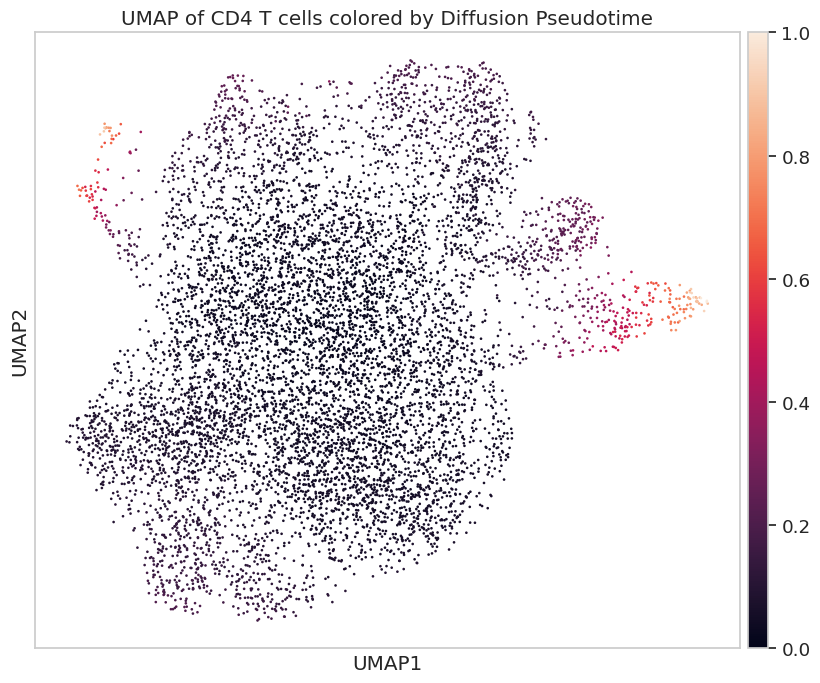

In [7]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# Subset CD4 T cells including both COVID and Healthy conditions
cd4_cells = adata[adata.obs['cell_type_coarse'] == 'CD4 T'].copy()

# Verify that both COVID and Healthy cells are represented
conditions = cd4_cells.obs['Status'].unique()
assert 'COVID' in conditions and 'Healthy' in conditions, "Both COVID and Healthy cells must be represented in the CD4 T cell subset."

# Identify highly variable genes within CD4 T cells using Scanpy's built-in function
sc.pp.highly_variable_genes(cd4_cells, flavor='seurat', n_top_genes=2000)

# Filter the dataset to include only the highly variable genes
cd4_cells = cd4_cells[:, cd4_cells.var['highly_variable']].copy()

# Scale the data for PCA (capping extreme values for stability)
sc.pp.scale(cd4_cells, max_value=10)

# Perform PCA for dimensionality reduction
sc.tl.pca(cd4_cells, svd_solver='arpack')

# Construct a neighborhood graph using the PCA results
sc.pp.neighbors(cd4_cells, n_neighbors=15, n_pcs=30)

# Compute a UMAP embedding for visualization of global structure
sc.tl.umap(cd4_cells)

# Selecting a root cell for DPT: preferentially choose a cell with low IL6R expression
if 'IL6R' in cd4_cells.var_names:
    il6r_expr = cd4_cells[:, 'IL6R'].X
    if hasattr(il6r_expr, 'toarray'):
        il6r_expr = il6r_expr.toarray().flatten()
    else:
        il6r_expr = np.array(il6r_expr).flatten()
    root_cell_index = int(il6r_expr.argmin())
else:
    root_cell_index = 0

# Set the root cell in the AnnData object
cd4_cells.uns['iroot'] = root_cell_index

# Compute diffusion pseudotime (DPT) with 10 diffusion components
sc.tl.dpt(cd4_cells, n_dcs=10, min_group_size=0.01)

# Visualize the UMAP embedding colored by diffusion pseudotime
sc.pl.umap(cd4_cells, color='dpt_pseudotime', title='UMAP of CD4 T cells colored by Diffusion Pseudotime', show=True)

### Agent Interpretation

The analysis shows a UMAP embedding of CD4 T cells colored by diffusion pseudotime, suggesting a trajectory or differentiation process within this cell type. The diffusion pseudotime provides insights into dynamic changes or states through which CD4 T cells transition, which could be relevant to understanding immune response dynamics in severe COVID-19.

Promising Results:
1. **Trajectories Captured**: The distribution of pseudotime values highlights potential transitions or activation states within the CD4 T cell population. This information can be valuable to identify stages of activation or exhaustion that could correlate with disease severity or progression.

Future Directions:
1. **Correlation with Clinical Data**: Cross-reference pseudotime clusters with clinical metadata to see if certain transitions correlate with disease severity, treatment, or recovery.
   
2. **Gene Expression Analysis**: Identify differentially expressed genes along the pseudotime trajectory to uncover potential gene markers associated with early activation or late exhaustion in the context of severe COVID-19.

3. **Pathway Enrichment Analysis**: Perform pathway enrichment on genes driving pseudotime to uncover biologically relevant pathways that CD4 T cells might influence during different states, potentially linking to cytokine response, exhaustion, or immune suppression.

4. **Integration with Monocyte Analysis**: Since your hypothesis focuses on monocyte and T cell interactions, explore whether pseudotime states correlate with monocyte activity or ligand-receptor interactions that might contribute to enhanced signaling pathways in severe COVID-19.

5. **Comparative Analysis**: Compare pseudotime trajectories between COVID-19 patients and healthy controls to see if there are distinct patterns or missing trajectory stages in severe cases.

Overall, the use of diffusion pseudotime allows exploration of temporal changes within the CD4 T cell population, offering a more nuanced understanding of immune responses in severe COVID-19 that aligns well with your hypothesis around cellular interactions and states contributing to disease pathology.

## This code extracts the diffusion pseudotime values and computes Spearman correlations only for highly variable genes. It then applies a manual Benjamini–Hochberg correction to adjust p-values, filters genes based on an adjusted p-value threshold, and plots a heatmap of the top positively and negatively correlated genes with cells ordered by pseudotime.

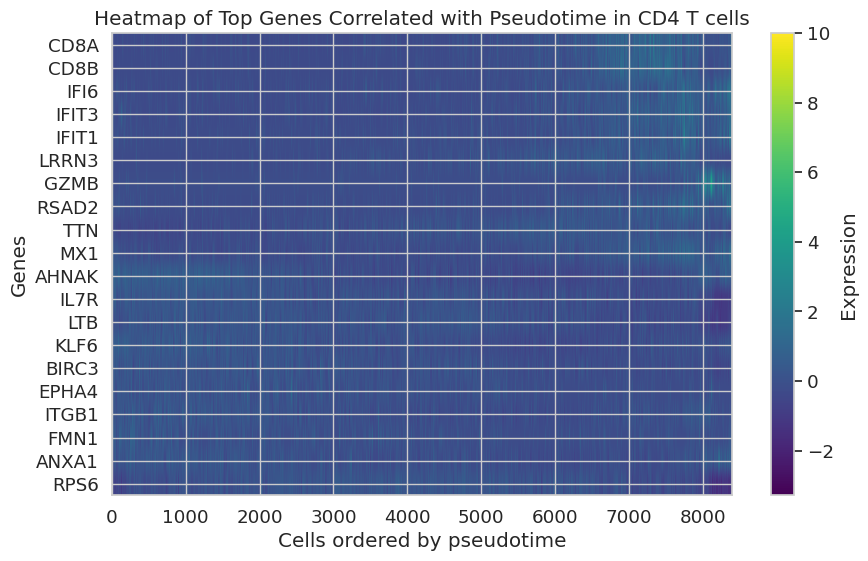

Pseudotime correlation analysis completed.


In [8]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Ensure that the diffusion pseudotime is available in the cd4_cells object
if 'dpt_pseudotime' not in cd4_cells.obs.columns:
    raise KeyError('dpt_pseudotime not found in cd4_cells.obs. Please run DPT analysis before this step.')

# Extract pseudotime values from cd4_cells
pseudotime = cd4_cells.obs['dpt_pseudotime'].values

# Ensure that we are iterating over only the highly variable genes
# (cd4_cells has already been filtered to retain only highly variable genes, but we add an extra check)
hvg = cd4_cells.var_names if 'highly_variable' not in cd4_cells.var.columns else cd4_cells.var.index[cd4_cells.var['highly_variable']].tolist()

# Initialize a list to store correlation results for each gene
correlation_results = []

# Loop over the highly variable genes
for gene in hvg:
    expr = cd4_cells[:, gene].X
    # Convert sparse matrix to dense array if needed
    if hasattr(expr, 'toarray'):
        expr = expr.toarray().flatten()
    else:
        expr = np.array(expr).flatten()
    
    # Calculate Spearman correlation between gene expression and pseudotime
    rho, p_val = spearmanr(expr, pseudotime)
    correlation_results.append((gene, rho, p_val))

# Convert correlation results into a DataFrame
cor_df = pd.DataFrame(correlation_results, columns=['gene', 'spearman_rho', 'p_val'])

# Apply Benjamini–Hochberg correction for multiple testing
pvals = cor_df['p_val'].values
m = len(pvals)
# Get the sorted indices
sorted_indices = np.argsort(pvals)
sorted_pvals = pvals[sorted_indices]

# Compute the BH adjusted p-values
bh_adjusted = np.empty(m)
for i, p in enumerate(sorted_pvals):
    bh_adjusted[i] = p * m / (i + 1)
    if bh_adjusted[i] > 1:
        bh_adjusted[i] = 1
# Ensure monotonicity of the adjusted p-values
for i in range(m - 2, -1, -1):
    bh_adjusted[i] = min(bh_adjusted[i], bh_adjusted[i + 1])

# Reorder the adjusted p-values to the original gene order
adj_pvals = np.empty(m)
adj_pvals[sorted_indices] = bh_adjusted
cor_df['adj_p_val'] = adj_pvals

# Filter for genes with significant correlation (adjusted p < 0.01) and sort by absolute correlation
significant_genes = cor_df[cor_df['adj_p_val'] < 0.01].copy()
significant_genes['abs_rho'] = significant_genes['spearman_rho'].abs()
significant_genes = significant_genes.sort_values('abs_rho', ascending=False)

# Select top 10 positively correlated and top 10 negatively correlated genes
top_pos = significant_genes[significant_genes['spearman_rho'] > 0].head(10)['gene'].values
top_neg = significant_genes[significant_genes['spearman_rho'] < 0].head(10)['gene'].values
selected_genes = list(top_pos) + list(top_neg)

# Order cells by pseudotime
order = np.argsort(pseudotime)
ordered_expr = cd4_cells[:, selected_genes].X
if hasattr(ordered_expr, 'toarray'):
    ordered_expr = ordered_expr.toarray()
ordered_expr = ordered_expr[order, :]

# Plot a heatmap of gene expression for the selected genes, with cells ordered by pseudotime
plt.figure(figsize=(10, 6))
plt.imshow(ordered_expr.T, aspect='auto', cmap='viridis')
plt.colorbar(label='Expression')
plt.yticks(ticks=np.arange(len(selected_genes)), labels=selected_genes)
plt.xlabel('Cells ordered by pseudotime')
plt.ylabel('Genes')
plt.title('Heatmap of Top Genes Correlated with Pseudotime in CD4 T cells')
plt.show()

print('Pseudotime correlation analysis completed.')

### Agent Interpretation

The pseudotime correlation analysis suggests dynamic gene expression changes in CD4 T cells during the course of COVID-19. The focus on CD4 T cells is relevant as they play a crucial role in immune response modulation. Here are some observations and recommendations:

1. **Interferon-Related Genes**: Genes like IFI6, IFIT1, and IFIT3 are associated with the interferon response. The upregulation of these may indicate an active interferon signaling pathway, potentially contributing to immune dysregulation. This aligns with the study's interest in interferon-driven gene expression.

2. **Cytotoxicity and Activation Markers**: Genes such as GZMB (granzyme B) and CD8A/B are indicative of cytotoxic activity and immune activation. Elevated expression might suggest increased immune activation or cytotoxic potential in CD4 T cells.

3. **Receptor and Ligand Interaction**: Investigate further whether these expression changes correlate with altered receptor and ligand interactions between monocytes and T cells, given that cell-cell communication is a key hypothesis in the study.

4. **Transcription Factors and Cell State**: Analyze transcription factors such as KLF6 and BIRC3 to explore potential regulatory mechanisms driving these expression changes, which might illuminate shifts in cell states or functions.

5. **Future Steps**:
   - Validate these pseudotime trends with independent datasets to ensure robustness.
   - Extend the analysis to other immune cell types, particularly monocytes, to compare pseudotime dynamics and their correlation with gene expression changes.
   - Consider integrating data on patient clinical outcomes to correlate gene expression trends with disease severity or progression.

The results of this pseudotime analysis appear promising for understanding the immune alterations in severe COVID-19, and further exploration can substantiate the hypothesized dysregulated immune communication pathways.